In [1]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import imageio
import os

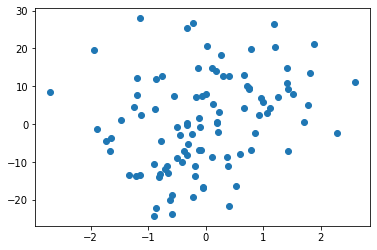

In [2]:
x ,y = make_regression(n_samples=100,n_features=1,bias=1,noise=12)
x = np.ndarray.flatten(x)
plt.scatter(x=x,y=y)

The function J fives us the Mean Squared Error (MSE) of the prediction.

$ J = \frac{1}{n}\sum_{i=1}^n(y_i-\hat{y}_i)^2$

$ J = \frac{1}{n}\sum_{i=1}^n(x_i*w_0+w_1-\hat{y}_i)^2$

We need to minimize J, therefore we calculate the derivatives in the directions $w_0$ and $w_1$

$\frac{\delta J}{\delta w_0} = \frac{2}{n}\sum_{i=1}^n(x_i*w_0+w_1-\hat{y}_i)*w_0$

$\frac{\delta J}{\delta w_1} = \frac{2}{n}\sum_{i=1}^n(x_i*w_0+w_1-\hat{y}_i)$

we then move \alpha steps into the direction of the negative gradient of each weight, thus we refresh the weights as follows:

$w_0 = w_0 - \alpha*\frac{\delta J}{\delta w_0} = w_0 - \alpha*\frac{2}{n}\sum_{i=1}^n(x_i*w_0+w_1-\hat{y}_i)*w_0$

$w_1 = w_1 - \alpha*\frac{\delta J}{\delta w_1} = w_1 - \alpha* \frac{2}{n}\sum_{i=1}^n(x_i*w_0+w_1-\hat{y}_i)$


We calculate the weights for every epoch until the weights converge.




In [3]:
epochs=10
w_0 = 0
w_1 = 0
alpha = 0.1

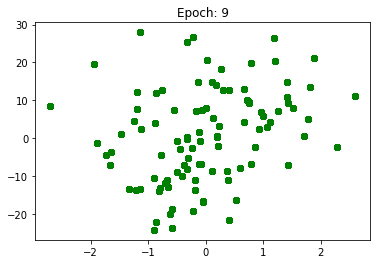

In [4]:
for i in range(epochs):

    dw = (2/len(x))*sum([(x_i*w_0+w_1-y_i)*x_i for x_i,y_i in zip(x,y)])
    db = (2/len(x))*sum([(x_i*w_0+w_1-y_i) for x_i,y_i in zip(x,y)])

    w_0 = w_0 - alpha*dw
    w_1 = w_1 -alpha*db

    line = plt.plot(x,[x_i*w_0+w_1 for x_i in x],"m")
    plt.title(f"Epoch: {i}")
    plt.scatter(x=x,y=y,c="g")
    plt.savefig(f"media/linear_regression/fig_{i}")
    
    line = line.pop(0)
    line.remove()

    


In [5]:
png_dir = 'media/linear_regression/'
images = []
for file_name in sorted(os.listdir(png_dir)):
    if file_name.endswith('.png'):
        file_path = os.path.join(png_dir, file_name)
        images.append(imageio.imread(file_path))
imageio.mimsave('media/movie.gif', images, format="GIF",fps=1)

![SegmentLocal](media/movie.gif "segment")